## Load and view data

###  Variable Dictionary

- overview of the variables included in the **Cardio Health Risk Assessment Dataset**
- Each variable classified by **type** and accompanied by **a brief description**
- dataset includes **demographic, clinical, and diagnostic features relevant to cardiovascular risk assessment.** 


In [131]:
import warnings
warnings.filterwarnings('ignore')

In [132]:
import pandas as pd

# Set display options to show all columns fully
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

# Overview of the variables
variables = [
    ["Age", "Numeric", "Age of the patient"],
    ["Sex", "Binary", "0 = Female, 1 = Male"],
    ["Chest pain type", "Categorical (1–4)", "no details about the scale"],
    ["BP", "Numeric", "Resting blood pressure in mmHg"],
    ["Cholesterol", "Numeric", "Serum cholesterol level in mg/dl"],
    ["FBS over 120", "Binary", "Fasting blood sugar > 120 mg/dl"],
    ["EKG results", "Categorical (0–2)", "0 = Normal, 1 = ST-T, 2 = LVH"],
    ["Max HR", "Numeric", "Maximum heart rate at exercise in bpm"],
    ["Exercise angina", "Binary", "0 = No, 1 = Yes"],
    ["ST depression", "Numeric", "Depression induced by exercise in mm"],
    ["Slope of ST", "Categorical (1–3)", "1 = Upsloping, 2 = Flat, 3 = Downsloping"],
    ["Number of vessels fluro", "Numeric", "Major vessels colored by fluoroscopy (= narrowed (stenosed)"],
    ["Thallium", "Categorical (3, 6, 7)", "Thallium stress test result (3 = Normal, 6 = Fixed defect, 7 = Reversible defect)"],
    ["Heart Disease", "Binary", "Presence or Absence (target variable)"]
]

df_variables = pd.DataFrame(variables, columns=["Variable", "Type", "Comment"])
display(df_variables)


,Variable,Type,Comment
0,Age,Numeric,Age of the patient
1,Sex,Binary,"0 = Female, 1 = Male"
2,Chest pain type,Categorical (1–4),no details about the scale
3,BP,Numeric,Resting blood pressure in mmHg
4,Cholesterol,Numeric,Serum cholesterol level in mg/dl
5,FBS over 120,Binary,Fasting blood sugar > 120 mg/dl
6,EKG results,Categorical (0–2),"0 = Normal, 1 = ST-T, 2 = LVH"
7,Max HR,Numeric,Maximum heart rate at exercise in bpm
8,Exercise angina,Binary,"0 = No, 1 = Yes"
9,ST depression,Numeric,Depression induced by exercise in mm


In [133]:
hdp = pd.read_csv("Heart_Disease_Prediction.csv")
hdp.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,80,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,55,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,65,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,45,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [134]:
hdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [135]:
hdp.shape

(270, 14)

In [136]:
#check for duplicates

duplicates = hdp[hdp.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Age, Sex, Chest pain type, BP, Cholesterol, FBS over 120, EKG results, Max HR, Exercise angina, ST depression, Slope of ST, Number of vessels fluro, Thallium, Heart Disease]
Index: []


In [137]:
##alternative check for duplicates
hdp = hdp.drop_duplicates()
hdp.shape


(270, 14)

#### Observation:
There are no duplicates and no missing values.
The dataset contains **270 entries and 14 variables**.

There are no further details about the categories of "Chest pain type". Therefore, we will remove this column.

Almost all columns have integers. We will adjust the type for the categorical columns and translate the meaning.

In [138]:
#remove chest pain type because of missing details
hdp = hdp.drop(columns=["Chest pain type"])

In [139]:
#correction of the datatypes
sex_map = {0: "Female", 1: "Male"}
hdp["Sex"] = hdp["Sex"].map(sex_map).astype("category")

hdp["FBS over 120"] = hdp["FBS over 120"].map({0: "No", 1: "Yes"}).astype("category")

ekg_map = {
    0: "Normal",
    1: "ST-T",
    2: "LVH"
}
hdp["EKG results"] = (
    hdp["EKG results"]
    .map(ekg_map)
    .astype("category")
)

hdp["Exercise angina"] = hdp["Exercise angina"].map({0: "No", 1: "Yes"}).astype("category")

thallium_map = {
    3: "Normal",
    6: "Fixed defect",
    7: "Reversible defect"
}
hdp["Thallium"] = hdp["Thallium"].map(thallium_map).astype("category")

st_slope_map = {
    1: "Upsloping(normal)",
    2: "Flat",
    3: "Downsloping"
}
hdp["Slope of ST"] = hdp["Slope of ST"].map(st_slope_map).astype("category")

hdp["Number of vessels fluro"] = hdp["Number of vessels fluro"].astype("category")

hdp["Heart Disease"] = hdp["Heart Disease"].astype("category")

hdp.head()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,Male,130,322,No,LVH,109,No,2.4,Flat,3,Normal,Presence
1,80,Female,115,564,No,LVH,160,No,1.6,Flat,0,Reversible defect,Absence
2,55,Male,124,261,No,Normal,141,No,0.3,Upsloping(normal),0,Reversible defect,Presence
3,65,Male,128,263,No,Normal,105,Yes,0.2,Flat,1,Reversible defect,Absence
4,45,Female,120,269,No,LVH,121,Yes,0.2,Upsloping(normal),1,Normal,Absence


In [140]:
hdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      270 non-null    int64   
 1   Sex                      270 non-null    category
 2   BP                       270 non-null    int64   
 3   Cholesterol              270 non-null    int64   
 4   FBS over 120             270 non-null    category
 5   EKG results              270 non-null    category
 6   Max HR                   270 non-null    int64   
 7   Exercise angina          270 non-null    category
 8   ST depression            270 non-null    float64 
 9   Slope of ST              270 non-null    category
 10  Number of vessels fluro  270 non-null    category
 11  Thallium                 270 non-null    category
 12  Heart Disease            270 non-null    category
dtypes: category(8), float64(1), int64(4)
memory usage: 13.9 KB


### Categorical distribution


In [141]:
#describe categories
from IPython.display import display

categorical_cols = [
    "Sex",
    "FBS over 120",
    "EKG results",
    "Exercise angina",
    "Slope of ST",
    "Thallium",
    "Heart Disease",
]

for col in categorical_cols:
    counts = hdp[col].value_counts(dropna=False).rename("count")
    print(f"\nCategory counts for {col}:")
    display(counts.to_frame())
    print("-" * 40)



Category counts for Sex:


,count
Sex,
Male,183
Female,87


----------------------------------------

Category counts for FBS over 120:


,count
FBS over 120,
No,230
Yes,40


----------------------------------------

Category counts for EKG results:


,count
EKG results,
LVH,137
Normal,131
ST-T,2


----------------------------------------

Category counts for Exercise angina:


,count
Exercise angina,
No,181
Yes,89


----------------------------------------

Category counts for Slope of ST:


,count
Slope of ST,
Upsloping(normal),130
Flat,122
Downsloping,18


----------------------------------------

Category counts for Thallium:


,count
Thallium,
Normal,152
Reversible defect,104
Fixed defect,14


----------------------------------------

Category counts for Heart Disease:


,count
Heart Disease,
Absence,150
Presence,120


----------------------------------------


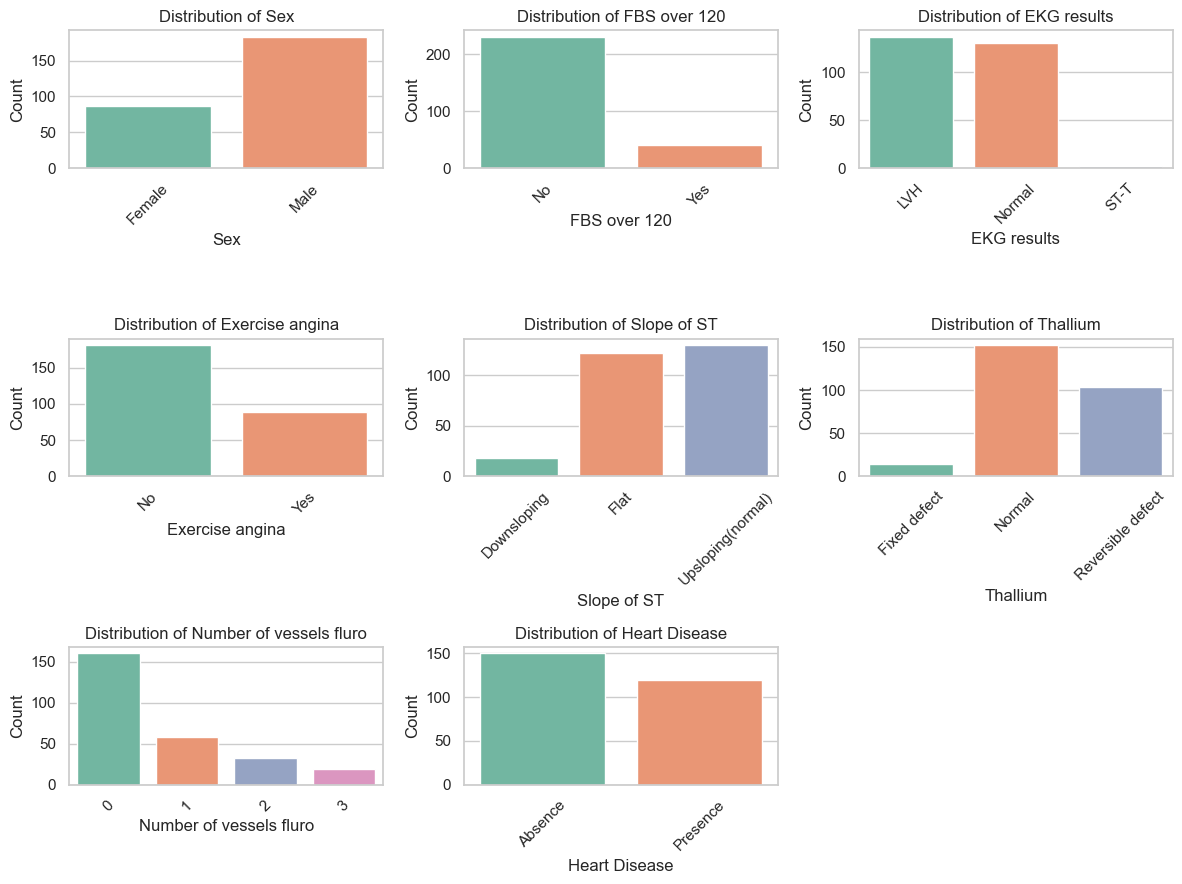

In [142]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

categorical_cols = [
    "Sex",
    "FBS over 120",
    "EKG results",
    "Exercise angina",
    "Slope of ST",
    "Thallium",
    "Number of vessels fluro",
    "Heart Disease",
]

n_cols = 3
n_rows = math.ceil(len(categorical_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    ax = axes[idx]
    order = hdp[col].cat.categories if hasattr(hdp[col], "cat") else None
    sns.countplot(data=hdp, x=col, order=order, palette="Set2", ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=45)

for ax in axes[len(categorical_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()


## Numerical distribution


 Variable: Age
count    270.000000
mean      54.077778
std        9.201052
min       29.000000
25%       47.000000
50%       54.000000
75%       60.750000
max       80.000000
Name: Age, dtype: float64


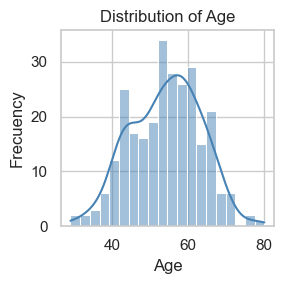


 Variable: BP
count    270.000000
mean     131.344444
std       17.861608
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: BP, dtype: float64


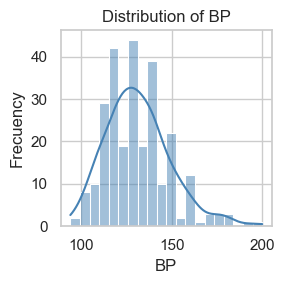


 Variable: Cholesterol
count    270.000000
mean     249.659259
std       51.686237
min      126.000000
25%      213.000000
50%      245.000000
75%      280.000000
max      564.000000
Name: Cholesterol, dtype: float64


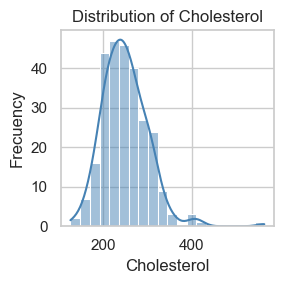


 Variable: Max HR
count    270.000000
mean     149.677778
std       23.165717
min       71.000000
25%      133.000000
50%      153.500000
75%      166.000000
max      202.000000
Name: Max HR, dtype: float64


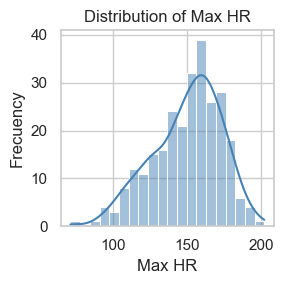


 Variable: ST depression
count    270.00000
mean       1.05000
std        1.14521
min        0.00000
25%        0.00000
50%        0.80000
75%        1.60000
max        6.20000
Name: ST depression, dtype: float64


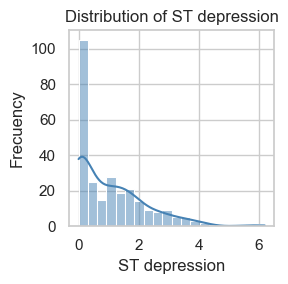

In [143]:
numeric_vars = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

for var in numeric_vars:
    print(f"\n Variable: {var}")
    print(hdp[var].describe())
    
    plt.figure(figsize=(3,3))
    sns.histplot(hdp[var], kde=True, bins=20, color='steelblue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuency')
    plt.tight_layout()
    plt.show()


## Summary table of the distribution of the variables

| Variable               | Type       | Observed Distribution                            | Detected Issues                  | Comments                                 |
|------------------------|------------|--------------------------------------------------|----------------------------------|--------------------------------------------------|
| Age                    | Numerical  | Normal, centered at 54. Range: 29–80             | No issues                        | Use mean and std               |
| BP                     | Numerical  | Right skew. Peak ~130. Range: 94–200             | Possible outliers >180           |  Check outliers                 |
| Cholesterol            | Numerical  | Right skew. Peak 240–260. Range: 126–564         | High values >500                 | Check outliers           |
| Max HR                 | Numerical  | Left skew. Peak 150–160. Range: 71–202           | No issues                        | Use mean and std               |
| ST depression          | Numerical  | Right skew. Peak ~0.5. Range: 0–6.2              | Low values concentrated          | check outliers                |
| Sex                    | Binary     | 183 males, 87 females                            | No issues                        | Consider imbalance                   |
| FBS over 120           | Binary     | 236 ≤120, 40 >120                                | No issues                        | Consider oversampling                |
| Exercise angina        | Binary     | 181 no angina, 89 with angina                    | No issues                        |                   |
| Heart Disease          | Binary     | 150 no disease, 120 with disease                 | imbalanced                       | should be balance               |
| EKG results            | Categorical| Type 1 rare, 0 and 2 balanced                    | Type 1 underrepresented          |              |
| Slope of ST            | Categorical| Type 1 and 2 dominant, type 3 rare               | Type 3 underrepresented          |            |
| Number of vessels fluro| Categorical ordinal | 0 dominant, 3 rare                               | No issues                        |   |
| Thallium               | Categorical| Type 3 dominant, type 6 rare                     | Type 6 underrepresented          |              |


### Remove outliers
We apply IQR-based outlier removal to "Cholesterol", "ST Depression" and BP variable because its distributions show a small number of extremely high values and even though some might be clinically possible, we will work with the most common cases.

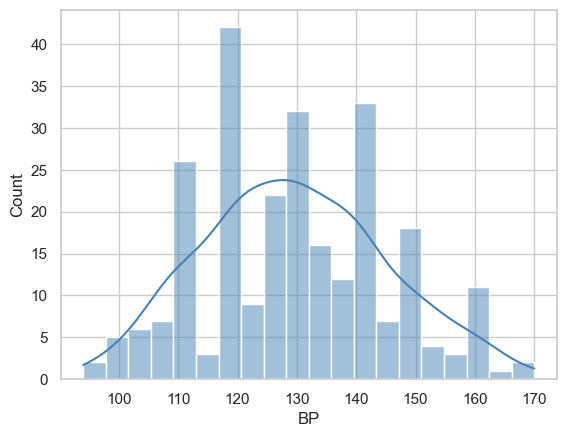

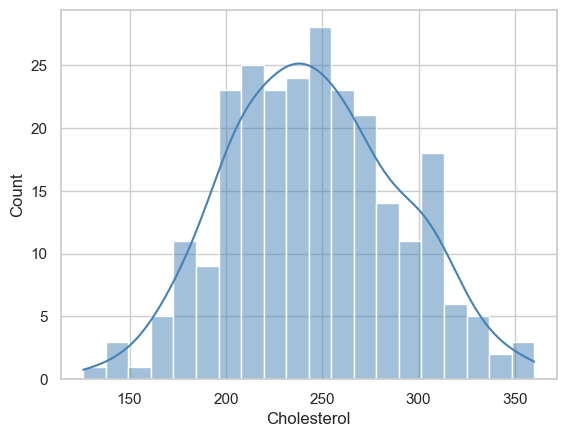

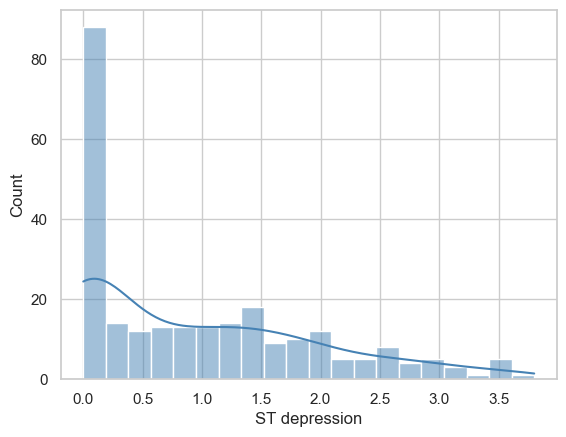

In [144]:
#remove outliers IQR method BP
Q1 = hdp['BP'].quantile(0.25)
Q3 = hdp['BP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
hdp = hdp[hdp['BP'] <= upper_bound]

#check distribution
sns.histplot(hdp['BP'], kde=True, bins=20, color='steelblue')
plt.show()

#remove outliers IQR method cholesterol
Q1 = hdp['Cholesterol'].quantile(0.25)
Q3 = hdp['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
hdp = hdp[hdp['Cholesterol'] <= upper_bound]   

#check distribution
sns.histplot(hdp['Cholesterol'], kde=True, bins=20, color='steelblue')
plt.show()

#remove outliers IQR method ST depression
Q1 = hdp['ST depression'].quantile(0.25)
Q3 = hdp['ST depression'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
hdp = hdp[hdp['ST depression'] <= upper_bound]

#check distribution
sns.histplot(hdp['ST depression'], kde=True, bins=20, color='steelblue')
plt.show()


### Correlations

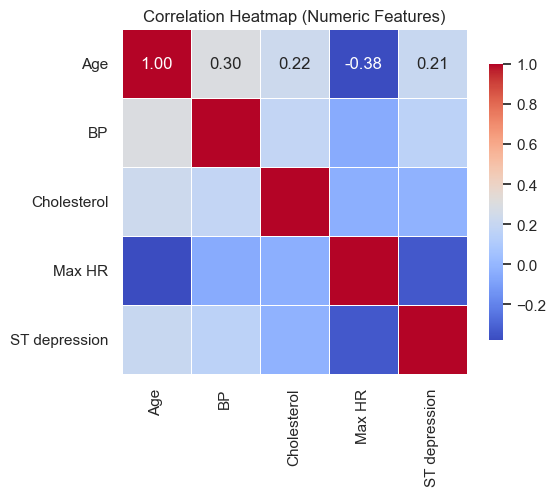

In [145]:
num_cols = hdp.select_dtypes(include="number")

corr = num_cols.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    square=True,
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()

In [146]:
corr

,Age,BP,Cholesterol,Max HR,ST depression
Age,1.000000,0.295402,0.224888,-0.378986,0.206396
BP,0.295402,1.000000,0.182077,-0.050575,0.156624
Cholesterol,0.224888,0.182077,1.000000,-0.039135,-0.022919
Max HR,-0.378986,-0.050575,-0.039135,1.000000,-0.341085
ST depression,0.206396,0.156624,-0.022919,-0.341085,1.000000


### Plot against heart disease
We will use boxplots with independent t-test for numerical variables and bar plots with chi square for categorical variables.

In [147]:
# Install scipy if not available
from scipy import stats
numeric_cols = num_cols.columns.tolist()
categorical_cols = categorical_cols[:-1]  # Exclude target variable


Independent t-test results for numerical variables:

Age:
  t-statistic: -3.8491
  p-value: 0.0002
  Significance: ***

BP:
  t-statistic: -1.7607
  p-value: 0.0795
  Significance: ns

Cholesterol:
  t-statistic: -2.5676
  p-value: 0.0108
  Significance: *

Max HR:
  t-statistic: 7.4680
  p-value: 0.0000
  Significance: ***

ST depression:
  t-statistic: -7.4114
  p-value: 0.0000
  Significance: ***


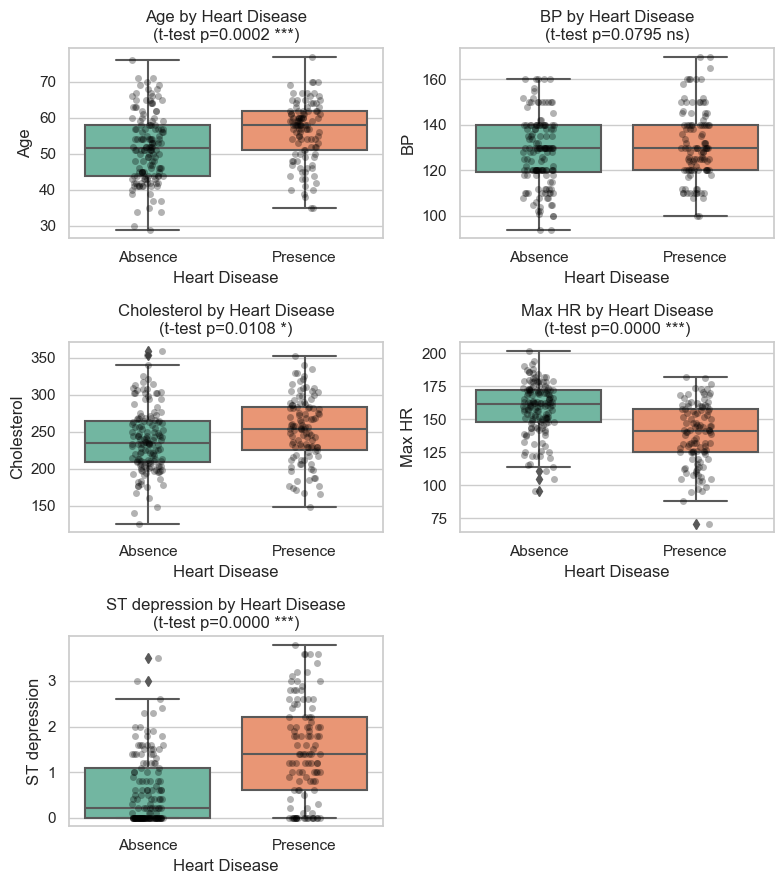


Chi-square test results for categorical variables:

Sex:
  Chi-square statistic: 28.4011
  p-value: 0.0000
  Degrees of freedom: 1
  Significance: ***

FBS over 120:
  Chi-square statistic: 0.0453
  p-value: 0.8314
  Degrees of freedom: 1
  Significance: ns

EKG results:
  Chi-square statistic: 10.1869
  p-value: 0.0061
  Degrees of freedom: 2
  Significance: **

Exercise angina:
  Chi-square statistic: 39.5512
  p-value: 0.0000
  Degrees of freedom: 1
  Significance: ***

Slope of ST:
  Chi-square statistic: 35.7935
  p-value: 0.0000
  Degrees of freedom: 2
  Significance: ***

Thallium:
  Chi-square statistic: 70.9957
  p-value: 0.0000
  Degrees of freedom: 2
  Significance: ***

Number of vessels fluro:
  Chi-square statistic: 58.1716
  p-value: 0.0000
  Degrees of freedom: 3
  Significance: ***


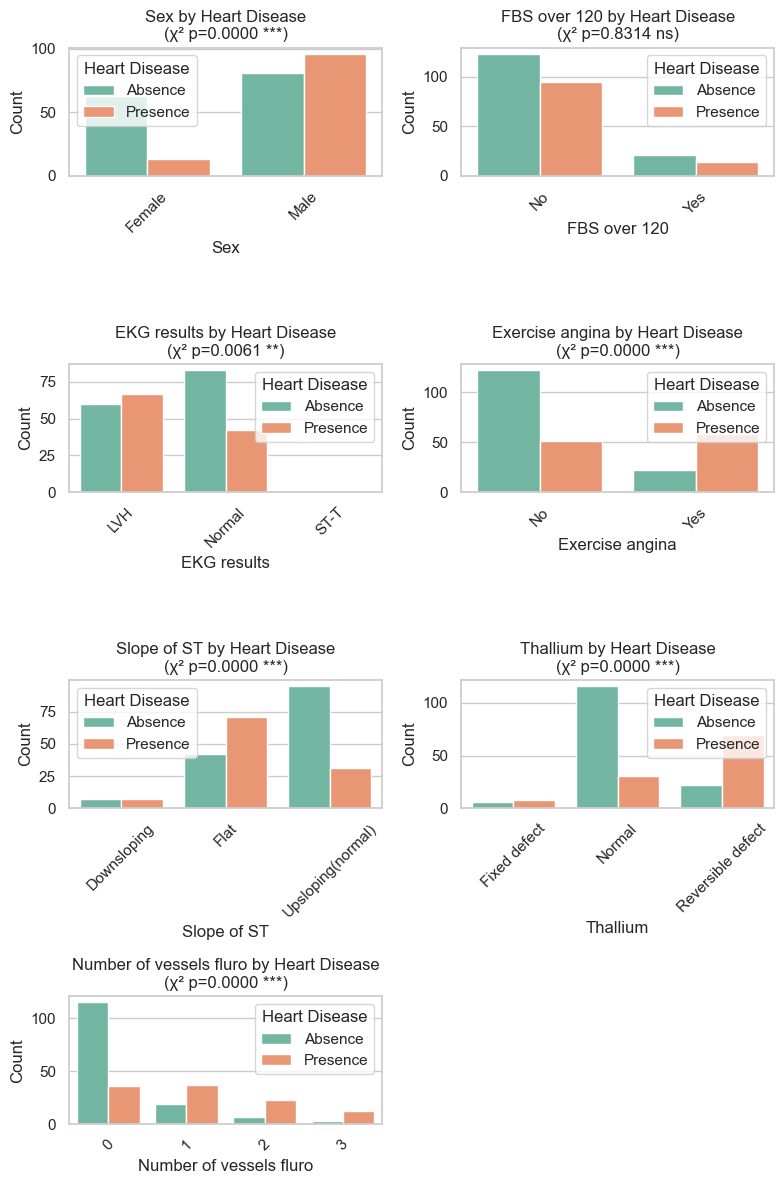


Significance levels: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant


In [148]:
# Plot numeric features vs Heart Disease with independent t-test
sns.set(style="whitegrid")
num_cols_plot = 2
num_rows = math.ceil(len(numeric_cols) / num_cols_plot)
fig, axes = plt.subplots(num_rows, num_cols_plot, figsize=(num_cols_plot * 4, num_rows * 3))
axes = axes.flatten()
box_color = sns.color_palette("Set2")[0]

print("=" * 60)
print("Independent t-test results for numerical variables:")
print("=" * 60)

for ax, col in zip(axes, numeric_cols):
    # Create boxplot
    sns.boxplot(data=hdp, x="Heart Disease", y=col, palette="Set2", ax=ax)
    sns.stripplot(data=hdp, x="Heart Disease", y=col, color="black", alpha=0.3, ax=ax)
    
    # Perform independent t-test
    # Get groups
    hd_categories = hdp["Heart Disease"].cat.categories if hasattr(hdp["Heart Disease"], "cat") else hdp["Heart Disease"].unique()
    group1 = hdp[hdp["Heart Disease"] == hd_categories[0]][col]
    group2 = hdp[hdp["Heart Disease"] == hd_categories[1]][col]
    
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(group1, group2)
    
    # Add p-value to title
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    ax.set_title(f"{col} by Heart Disease\n(t-test p={p_value:.4f} {significance})")
    ax.set_xlabel("Heart Disease")
    ax.set_ylabel(col)
    
    # Print results
    print(f"\n{col}:")
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    print(f"  Significance: {significance}")

for ax in axes[len(numeric_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()

# Plot categorical features vs Heart Disease with chi-square test
n_cols = 2
n_rows = int(math.ceil(len(categorical_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten()

print("\n" + "=" * 60)
print("Chi-square test results for categorical variables:")
print("=" * 60)

for idx, col in enumerate(categorical_cols):
    ax = axes[idx]
    order = hdp[col].cat.categories if hasattr(hdp[col], "cat") else None
    sns.countplot(data=hdp, x=col, hue="Heart Disease", order=order, palette="Set2", ax=ax)
    
    # Perform chi-square test
    # Create contingency table
    contingency_table = pd.crosstab(hdp[col], hdp["Heart Disease"])
    
    # Perform chi-square test
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
    # Add p-value to title
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    ax.set_title(f"{col} by Heart Disease\n(χ² p={p_value:.4f} {significance})")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=45)
    
    # Print results
    print(f"\n{col}:")
    print(f"  Chi-square statistic: {chi2:.4f}")
    print(f"  p-value: {p_value:.4f}")
    print(f"  Degrees of freedom: {dof}")
    print(f"  Significance: {significance}")

for ax in axes[len(categorical_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("Significance levels: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant")
print("=" * 60)



#### Observation:

Many values and categories show clear differences for the "Presence" and "Absence" of the heart disease. Especially the test results related to exercises show  a clear differentiation. We will compare different variables at rest and at exercise to find further relations.


##### Statistical analysis:
For scatter plots (age vs. max HR, max HR vs. ST depression, BP vs. cholesterol):

- Pearson correlation test for each heart disease group

- Overall correlation across all groups

- Correlation coefficient (r) and p-value

For box plot (ST depression by number of vessels and heart disease):

- ANOVA test (F-test) for differences between groups

- F-statistic and p-value 

All tests show significance markers (* p<0.001, p<0.01, * p<0.05, ns = not significant) and output detailed results in the console.

Correlation tests for scatterplots:

Age vs Max HR (Absence): r=-0.4486, p=0.0000 ***

Age vs Max HR (Presence): r=-0.1565, p=0.1042 ns


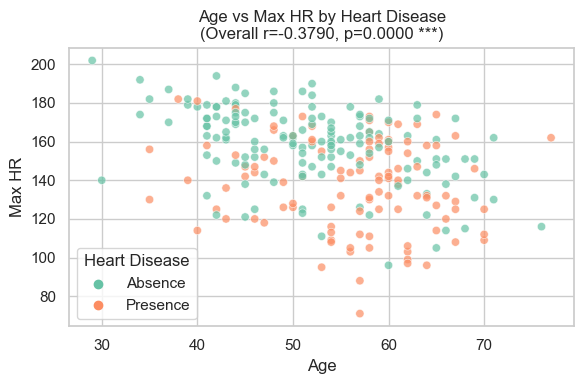


Max HR vs ST depression (Absence): r=-0.1769, p=0.0339 *

Max HR vs ST depression (Presence): r=-0.2123, p=0.0267 *


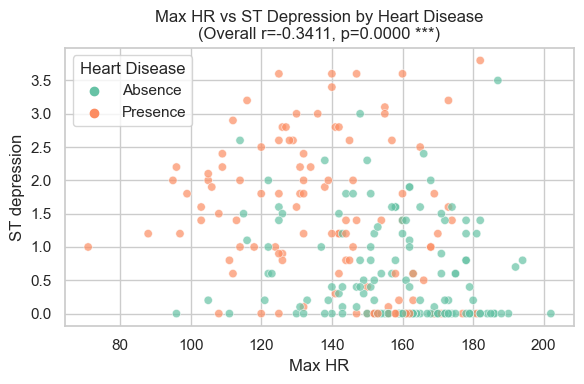


BP vs Cholesterol (Absence): r=0.1071, p=0.2014 ns

BP vs Cholesterol (Presence): r=0.2447, p=0.0103 *


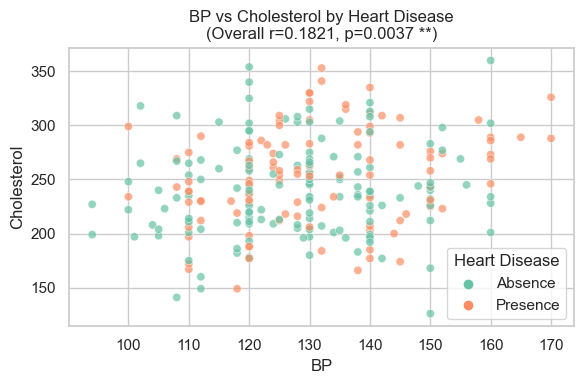


ST Depression by Vessels & Heart Disease (ANOVA): F=8.4509, p=0.0000 ***


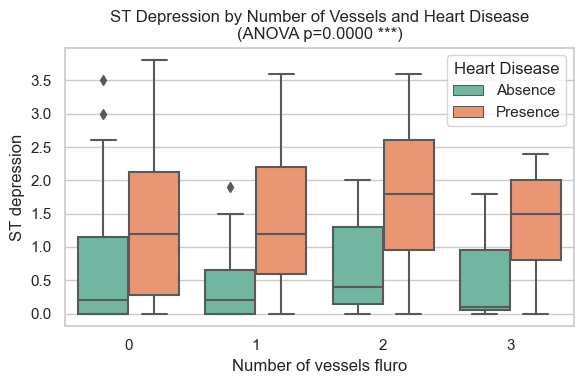


Significance levels: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant


In [149]:
# Additional relationship plots focusing on Heart Disease
target_palette = "Set2"

# Get Heart Disease categories
hd_categories = hdp["Heart Disease"].cat.categories if hasattr(hdp["Heart Disease"], "cat") else hdp["Heart Disease"].unique()

print("=" * 60)
print("Correlation tests for scatterplots:")
print("=" * 60)

# 1. Age vs Max HR
plt.figure(figsize=(6, 4))
sns.scatterplot(data=hdp, x="Age", y="Max HR", hue="Heart Disease", palette=target_palette, alpha=0.7)
# Calculate correlation for each group
for hd_cat in hd_categories:
    group_data = hdp[hdp["Heart Disease"] == hd_cat][["Age", "Max HR"]].dropna()
    if len(group_data) > 2:
        corr, p_val = stats.pearsonr(group_data["Age"], group_data["Max HR"])
        sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
        print(f"\nAge vs Max HR ({hd_cat}): r={corr:.4f}, p={p_val:.4f} {sig}")
# Overall correlation
corr_all, p_all = stats.pearsonr(hdp["Age"].dropna(), hdp["Max HR"].dropna())
sig_all = "***" if p_all < 0.001 else "**" if p_all < 0.01 else "*" if p_all < 0.05 else "ns"
plt.title(f"Age vs Max HR by Heart Disease\n(Overall r={corr_all:.4f}, p={p_all:.4f} {sig_all})")
plt.tight_layout()
plt.show()

# 2. Max HR vs ST depression
plt.figure(figsize=(6, 4))
sns.scatterplot(data=hdp, x="Max HR", y="ST depression", hue="Heart Disease", palette=target_palette, alpha=0.7)
# Calculate correlation for each group
for hd_cat in hd_categories:
    group_data = hdp[hdp["Heart Disease"] == hd_cat][["Max HR", "ST depression"]].dropna()
    if len(group_data) > 2:
        corr, p_val = stats.pearsonr(group_data["Max HR"], group_data["ST depression"])
        sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
        print(f"\nMax HR vs ST depression ({hd_cat}): r={corr:.4f}, p={p_val:.4f} {sig}")
corr_all, p_all = stats.pearsonr(hdp["Max HR"].dropna(), hdp["ST depression"].dropna())
sig_all = "***" if p_all < 0.001 else "**" if p_all < 0.01 else "*" if p_all < 0.05 else "ns"
plt.title(f"Max HR vs ST Depression by Heart Disease\n(Overall r={corr_all:.4f}, p={p_all:.4f} {sig_all})")
plt.tight_layout()
plt.show()

# 3. BP vs Cholesterol
plt.figure(figsize=(6, 4))
sns.scatterplot(data=hdp, x="BP", y="Cholesterol", hue="Heart Disease", palette=target_palette, alpha=0.7)
# Calculate correlation for each group
for hd_cat in hd_categories:
    group_data = hdp[hdp["Heart Disease"] == hd_cat][["BP", "Cholesterol"]].dropna()
    if len(group_data) > 2:
        corr, p_val = stats.pearsonr(group_data["BP"], group_data["Cholesterol"])
        sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
        print(f"\nBP vs Cholesterol ({hd_cat}): r={corr:.4f}, p={p_val:.4f} {sig}")
corr_all, p_all = stats.pearsonr(hdp["BP"].dropna(), hdp["Cholesterol"].dropna())
sig_all = "***" if p_all < 0.001 else "**" if p_all < 0.01 else "*" if p_all < 0.05 else "ns"
plt.title(f"BP vs Cholesterol by Heart Disease\n(Overall r={corr_all:.4f}, p={p_all:.4f} {sig_all})")
plt.tight_layout()
plt.show()

# 4. ST Depression by Number of Vessels and Heart Disease (2-way ANOVA)
plt.figure(figsize=(6, 4))
sns.boxplot(data=hdp, x="Number of vessels fluro", y="ST depression", hue="Heart Disease", palette=target_palette)
# Perform 2-way ANOVA
# Prepare data for ANOVA
vessels_cats = sorted(hdp["Number of vessels fluro"].cat.categories if hasattr(hdp["Number of vessels fluro"], "cat") else hdp["Number of vessels fluro"].unique())
groups = []
for vessel in vessels_cats:
    for hd_cat in hd_categories:
        group_data = hdp[(hdp["Number of vessels fluro"] == vessel) & (hdp["Heart Disease"] == hd_cat)]["ST depression"].dropna()
        if len(group_data) > 0:
            groups.append(group_data)
if len(groups) >= 2:
    f_stat, p_val = stats.f_oneway(*groups)
    sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
    print(f"\nST Depression by Vessels & Heart Disease (ANOVA): F={f_stat:.4f}, p={p_val:.4f} {sig}")
    plt.title(f"ST Depression by Number of Vessels and Heart Disease\n(ANOVA p={p_val:.4f} {sig})")
else:
    plt.title("ST Depression by Number of Vessels and Heart Disease")
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("Significance levels: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant")
print("=" * 60)



#### Conclusion:

The first scatter plot shows a highly significant correlation but the "Age" is rather uninteressting for our message.
The second scatter plot shows also a highly significant correlation of two results during exercises, the "ST Depression" and "Max HR". Also, the groups of heart disease "presence" and "absence" are clearly distinct. 
We will break down our focus to this scater plot and the results of "ST slope". They appear (regarding our message) for us as the most interesting and show a clear differentiation between the 2 Heart Diseas groups.
Also, we will further work with the cholesterol level and "BP" as a results at rest. In this way we compare tests at rest and stress. The results of "Cholesterol" at rest shows in contrast to the stresst tests a less clear differentaition but is still significant. The "BP" results do not show a significant differende. The tests during or after an exercise seem more sensitive.

Chosen plots for our message:

- Scatter plots of max HR vs. ST depression

- Boxplot of "Cholesterol" vs "Heart Disease" and "BP" vs "Heart Disease"

- Bar plots of "ST slope" vs "Heart Disease"